# Insurance Claims- Fraud Detection

Problem Statement:
    
Business case:
    
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

some columns are useless so we can delete that column

In [4]:
data=data.drop(["_c39"],axis=1)
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [5]:
pd.set_option("display.max_columns",None)
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [6]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [7]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

# Label Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()  

data["policy_state"]=le.fit_transform(data["policy_state"])
data["insured_sex"]=le.fit_transform(data["insured_sex"])
data["insured_education_level"]=le.fit_transform(data["insured_education_level"])
data["insured_occupation"]=le.fit_transform(data["insured_occupation"])
data["insured_hobbies"]=le.fit_transform(data["insured_hobbies"])
data["insured_relationship"]=le.fit_transform(data["insured_relationship"])
data["incident_type"]=le.fit_transform(data["incident_type"])
data["collision_type"]=le.fit_transform(data["collision_type"])
data["incident_severity"]=le.fit_transform(data["incident_severity"])
data["authorities_contacted"]=le.fit_transform(data["authorities_contacted"])
data["incident_state"]=le.fit_transform(data["incident_state"])
data["incident_city"]=le.fit_transform(data["incident_city"])
data["incident_location"]=le.fit_transform(data["incident_location"])
data["property_damage"]=le.fit_transform(data["property_damage"])
data["police_report_available"]=le.fit_transform(data["police_report_available"])
data["auto_make"]=le.fit_transform(data["auto_make"])
data["auto_model"]=le.fit_transform(data["auto_model"])
data["fraud_reported"]=le.fit_transform(data["fraud_reported"])
data["incident_date"]=le.fit_transform(data["incident_date"])
data["policy_csl"]=le.fit_transform(data["policy_csl"])
data["policy_bind_date"]=le.fit_transform(data["policy_bind_date"])

In [9]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,49,2,3,0,4,4,1,996,5,1,2,1,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,41,3,0,1,4,5,5,628,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,44,0,2,1,4,1,1,685,7,3,1,2,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,19,2,1,0,4,2,0,669,5,1,0,1,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,34,3,0,1,2,1,0,220,20,1,1,0,1,1,6500,1300,650,4550,0,31,2009,0


# checking correlation

In [10]:
data.corr()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.055055,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,-0.000833,0.009814,-0.093661,0.069727,0.006399,0.020209,-0.002985,-0.017377,-0.017824,-0.059581,0.010021,0.005369,-0.000130,-0.013630,0.070639,0.014736,0.007040,-0.010162,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,0.059413,0.056538,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,0.000969,0.017220,-0.081315,0.074832,-0.007075,0.007368,0.002416,-0.025626,-0.018672,-0.058439,0.015417,0.005770,-0.002291,-0.011101,0.087161,0.022102,-0.001486,-0.015679,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,0.045713,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,0.004564,-0.037264,-0.014422,0.039896,0.017120,0.009802,-0.005669,0.053022,0.001742,-0.013402,-0.015719,0.018565,-0.010064,-0.035406,0.016393,0.000113,0.013432,0.005575,-0.004558,-0.012661,0.032019,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443
policy_bind_date,0.055055,0.056538,0.045713,1.000000,0.015289,0.008486,-0.001721,-0.037733,-0.024866,-0.042749,0.039338,0.040606,0.006720,0.020085,0.017710,-0.004535,-0.026123,0.008022,0.000164,0.004271,-0.055760,-0.032065,0.043035,0.034437,-0.001244,-0.012582,-0.002381,-0.011615,-0.046970,-0.007004,-0.034920,0.015901,0.024160,0.008611,0.013784,-0.025955,0.000306,0.035067,0.060642
policy_state,-0.000328,-0.014533,0.072815,0.015289,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,-0.034327,-0.031215,-0.038689,-0.018506,0.074551,-0.030338,0.027287,0.031848,0.034739,-0.026377,-0.016777,0.008723,-0.002077,0.029534,0.029457,-0.042263,0.008623,0.013384,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.038917,0.008486,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,0.009153,0.015788,-0.005960,-0.030063,0.005249,-0.034612,-0.010140,0.011997,-0.036687,0.022530,0.056182,0.032814,0.009333,0.047704,-0.001869,-0.019403,-0.027340,-0.000595,0.071500,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,-0.006738,-0.001721,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,0.015217,-0.046733,0.004061,-0.022945,0.035212,-0.023544,-0.024055,-0.038411,-0.033182,-0.015711,-0.000760,0.006517,-0.045117,-0.009281,0.060935,0.051214,0.016900,-0.022765,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,-0.037733,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,-0.019715,0.035922,-0.018019,0.001925,-0.013738,0.023547,0.028257,0.053603,0.036719,-0.011155,-0.055191,0.046434,0.048724,0.017883,-0.001578,-0.045991,0.095359,0.026780,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,-0.024866,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,-0.019357,0.023422,-0.037000,0.077495,-0.047268,-0.024056,-0.009471,0.015966,-0.025913,0.009466,0.029044,-0.077492,0.013094,0.014510,-0.023257,-0.021270,-0.056957,0.022743,-0.006738,-0.055951,-0.040344,-0.045412,-0

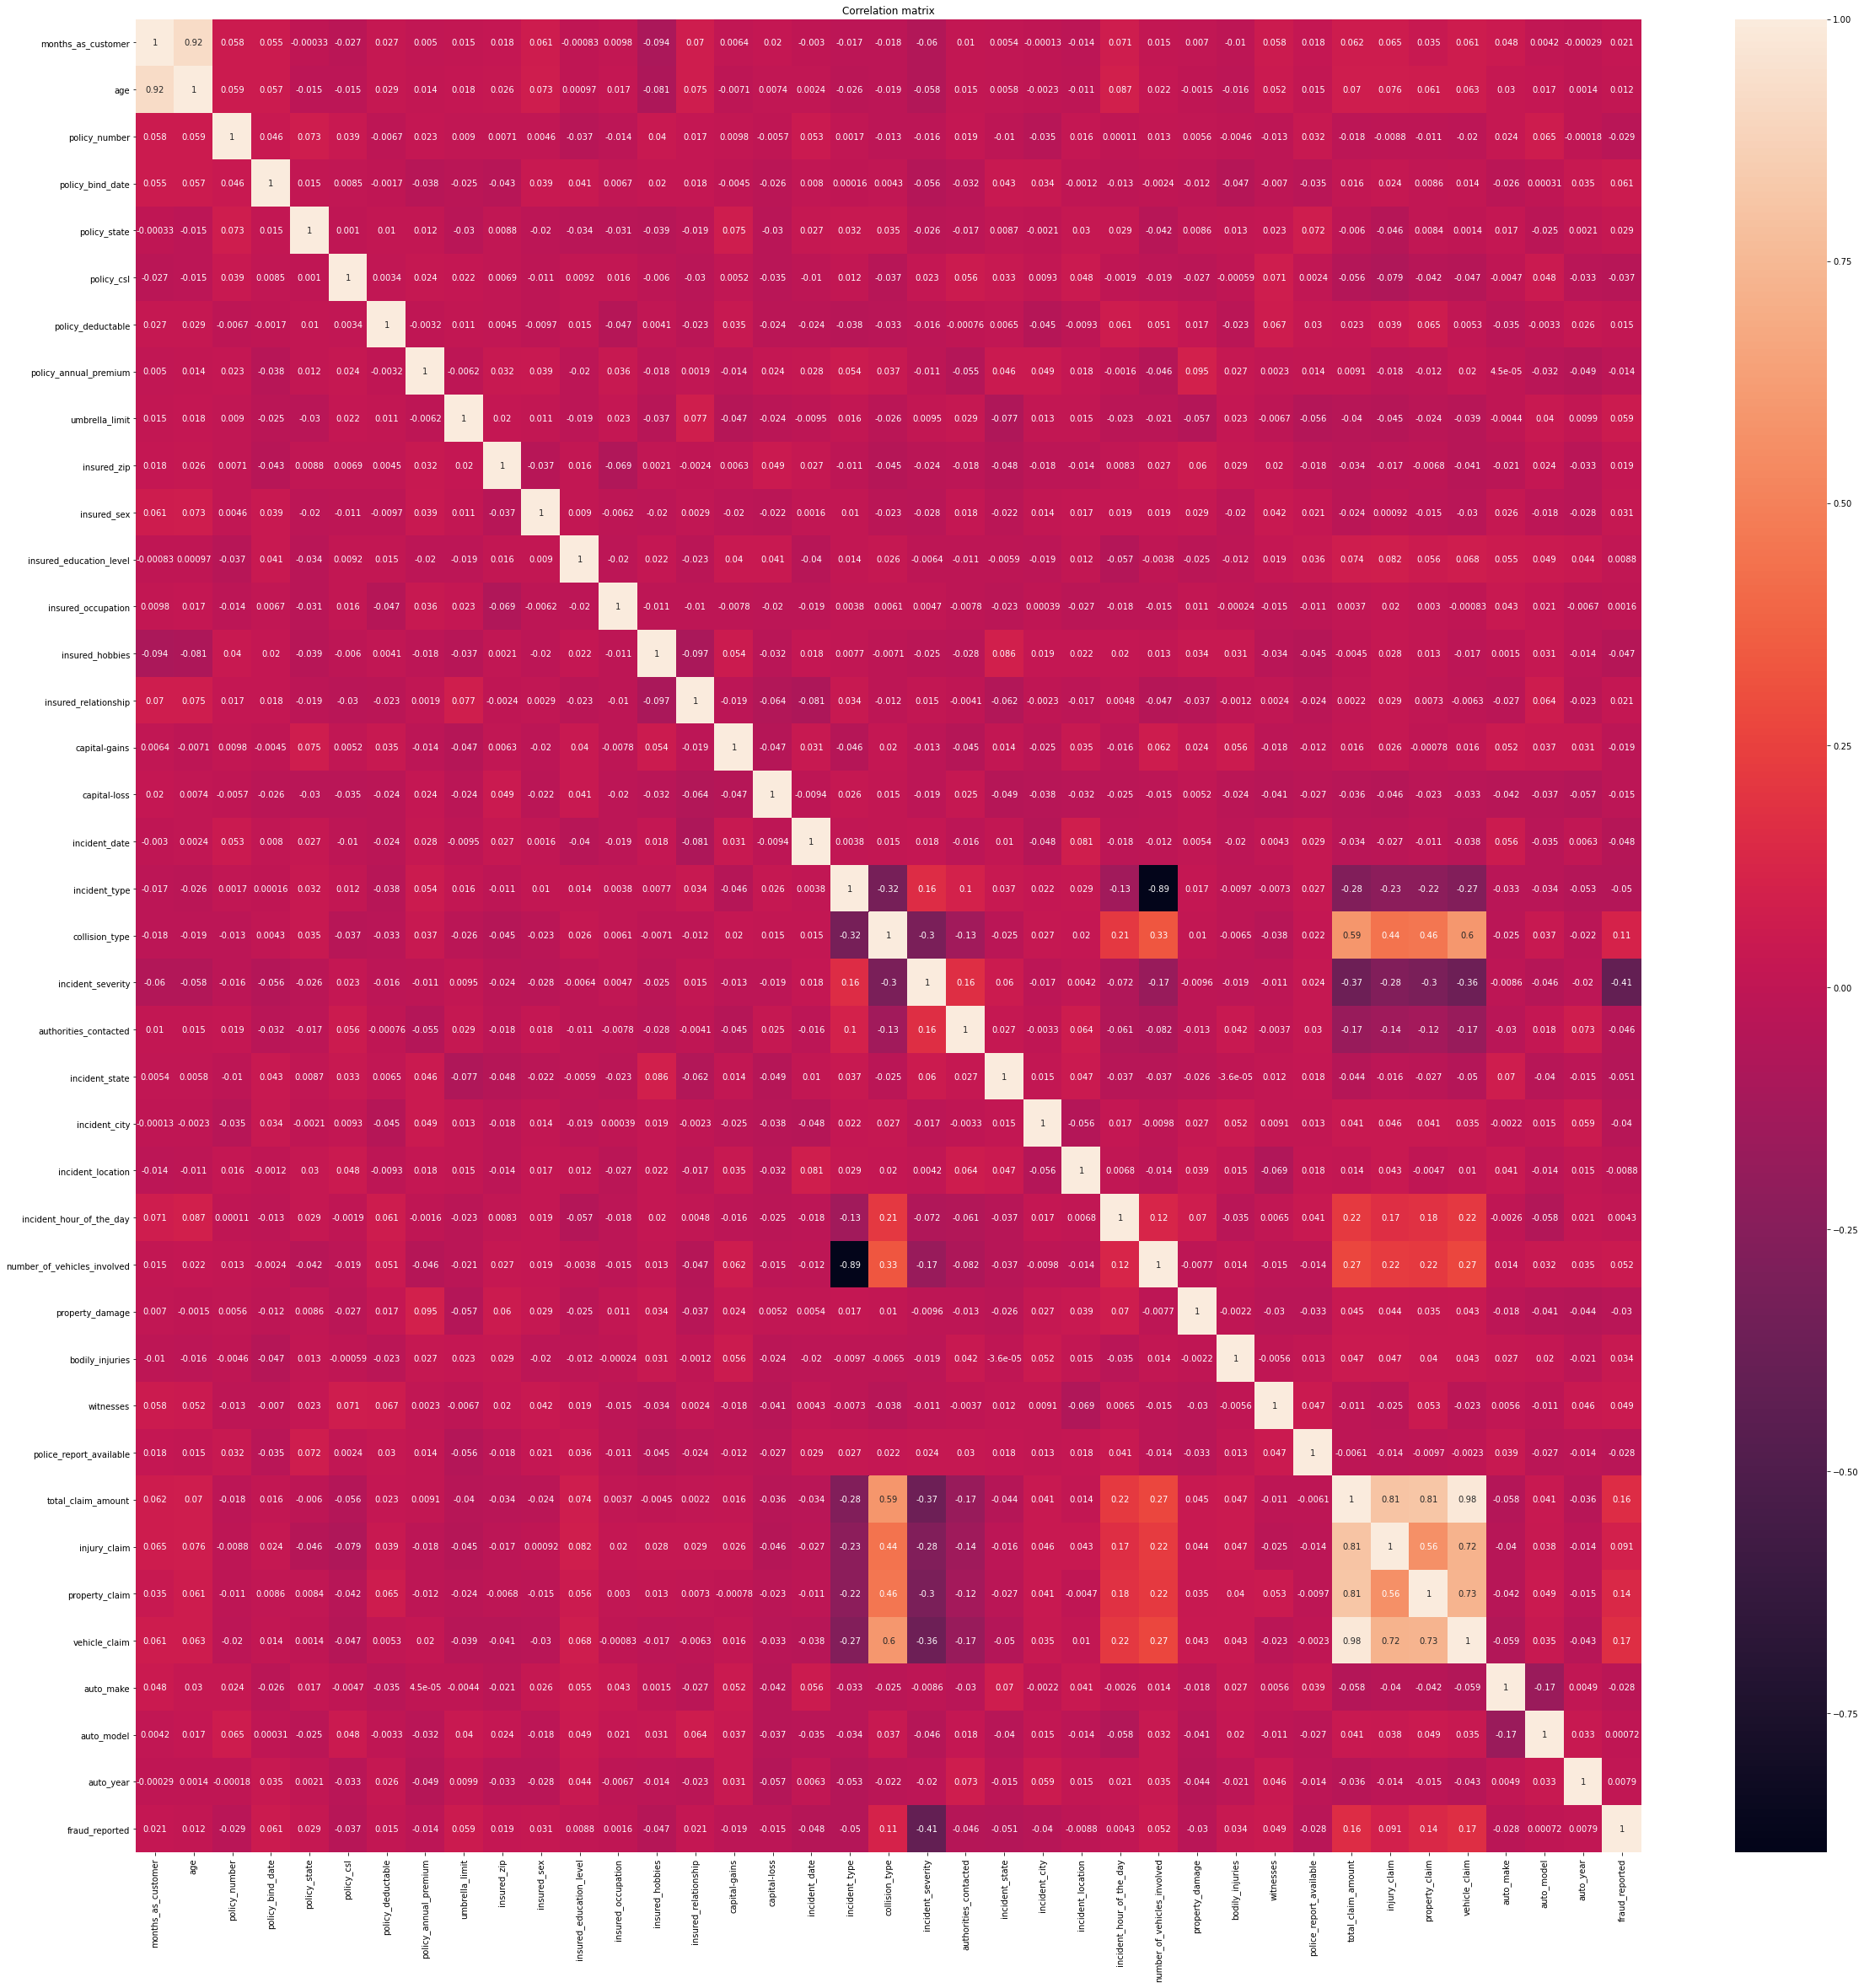

In [11]:
#plotting graph for correlation
plt.figure(figsize=[40,40])

#plot the correlation matrix
sns.heatmap(data.corr(),annot=True)
plt.title("Correlation matrix")
plt.show()

#some column having high correlation so lets delete one of them columns

In [12]:
data=data.drop(["total_claim_amount","age"],axis=1)

In [13]:
data.head()

,months_as_customer,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,521585,532,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,49,2,3,0,4,4,1,996,5,1,2,1,2,2,6510,13020,52080,10,1,2004,1
1,228,342868,821,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,41,3,0,1,4,5,5,628,8,1,0,0,0,0,780,780,3510,8,12,2007,1
2,134,687698,186,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,44,0,2,1,4,1,1,685,7,3,1,2,3,1,7700,3850,23100,4,30,2007,0
3,256,227811,766,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,19,2,1,0,4,2,0,669,5,1,0,1,2,1,6340,6340,50720,3,34,2014,1
4,228,367455,181,0,2,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,34,3,0,1,2,1,0,220,20,1,1,0,1,1,1300,650,4550,0,31,2009,0


In [14]:
#correlation of all columns along with target variable
corr_matrix=data.corr()
corr_matrix["fraud_reported"].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
property_claim                 0.137835
collision_type                 0.110130
injury_claim                   0.090975
policy_bind_date               0.060642
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
policy_deductable              0.014817
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
incident_location             -0.008832
policy_annual_premium         -0.014480
capital-loss                  -0.014863
capital-gains                 -0.019173


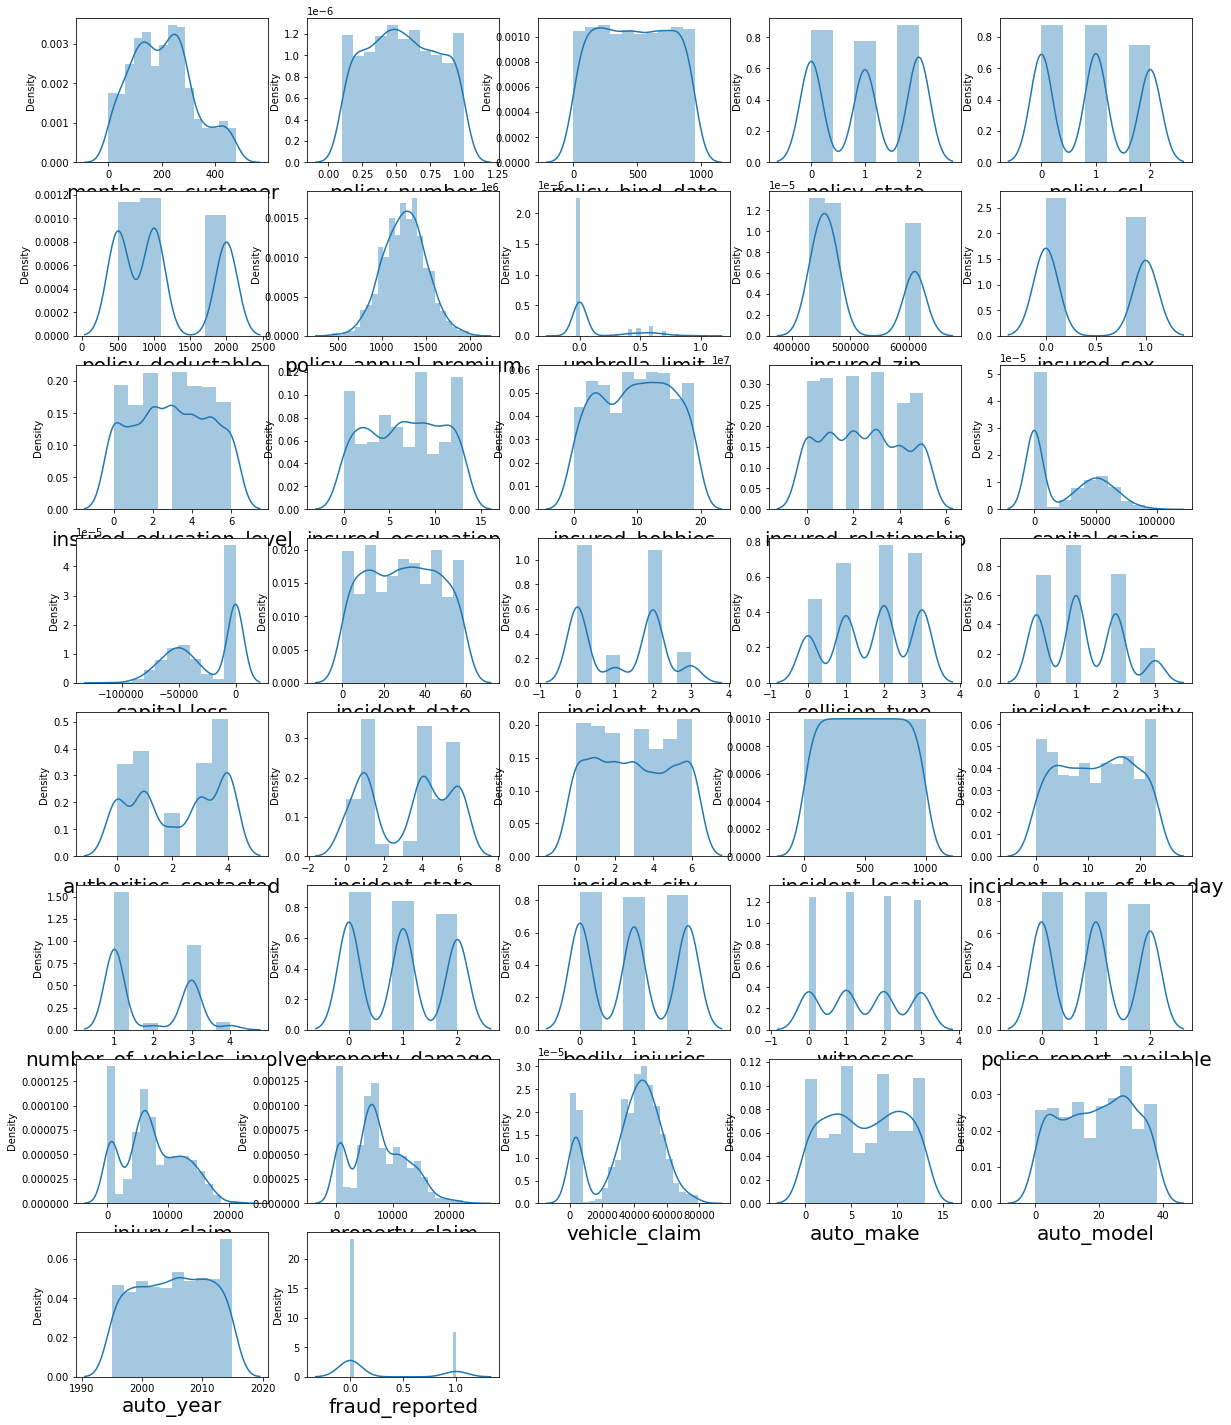

In [15]:
#let's check the data distribution among all the columns



plt.figure(figsize=(20,25))
plotnumber=1

for column in data:
    if plotnumber<=40:
        ax=plt.subplot(8,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [16]:
#spliting data into independent and dependent variable
x=data.drop(['fraud_reported'],axis=1)
y=data["fraud_reported"]

In [17]:
x

,months_as_customer,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,521585,532,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,49,2,3,0,4,4,1,996,5,1,2,1,2,2,6510,13020,52080,10,1,2004
1,228,342868,821,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,41,3,0,1,4,5,5,628,8,1,0,0,0,0,780,780,3510,8,12,2007
2,134,687698,186,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,44,0,2,1,4,1,1,685,7,3,1,2,3,1,7700,3850,23100,4,30,2007
3,256,227811,766,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,19,2,1,0,4,2,0,669,5,1,0,1,2,1,6340,6340,50720,3,34,2014
4,228,367455,181,0,2,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,34,3,0,1,2,1,0,220,20,1,1,0,1,1,1300,650,4550,0,31,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,941851,487,2,2,1000,1310.80,0,431289,0,5,2,13,4,0,0,44,2,1,1,1,0,4,561,20,1,2,0,1,0,17440,8720,61040,6,6,2006
996,285,186934,129,0,0,1000,1436.79,0,608177,0,6,9,17,5,70900,0,47,2,2,0,1,4,3,227,23,1,2,2,3,0,18080,18080,72320,13,28,2015
997,130,918516,509,2,1,500,1383.49,3000000,442797,0,5,1,3,2,35100,0,45,0,3,1,4,0,0,746,4,3,0,2,3,2,7500,7500,52500,11,19,1996
998,458,533940,573,0,2,2000,1356.92,5000000,441714,1,0,5,0,5,0,0,52,2,2,0,3,1,0,569,2,1,0,0,1,2,5220,5220,36540,1,5,1998


In [18]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int32

# check skewness

In [19]:
x.skew().sort_values()

vehicle_claim                 -0.621098
capital-loss                  -0.391472
collision_type                -0.193345
incident_state                -0.148865
authorities_contacted         -0.121744
auto_model                    -0.080773
insured_hobbies               -0.061563
insured_occupation            -0.058881
auto_year                     -0.048289
incident_hour_of_the_day      -0.035584
policy_state                  -0.026177
auto_make                     -0.018797
insured_education_level       -0.000148
incident_location              0.000000
policy_annual_premium          0.004402
incident_date                  0.004756
policy_bind_date               0.005194
bodily_injuries                0.014777
witnesses                      0.019636
policy_number                  0.038991
incident_city                  0.049531
police_report_available        0.052967
insured_relationship           0.077488
policy_csl                     0.088928
incident_type                  0.101507


one or two column are little skeweed so lets proceed ahead

# checking outliers

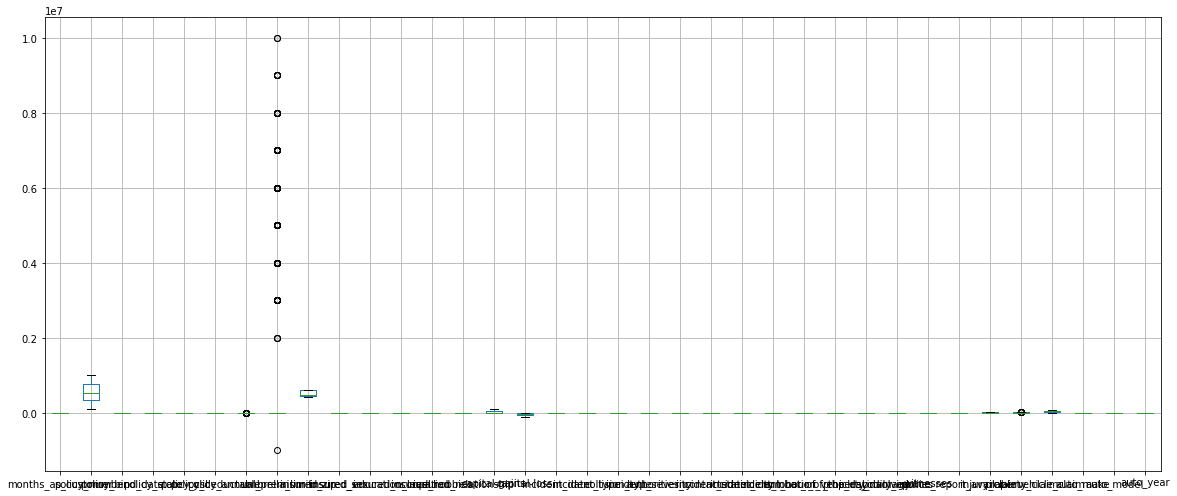

In [20]:
#plotting boxplot for columns
x.boxplot(figsize=(20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

one column is having outliers so handle them

In [21]:
#find the IQR (inter quantile range) to identify outliers

#1St quantile
q1=data.quantile(0.25)

#3rd quantile
q3=data.quantile(0.75)

#IOR
iqr=q3-q1

In [22]:
q1

months_as_customer                115.7500
policy_number                  335980.2500
policy_bind_date                  233.7500
policy_state                        0.0000
policy_csl                          0.0000
policy_deductable                 500.0000
policy_annual_premium            1089.6075
umbrella_limit                      0.0000
insured_zip                    448404.5000
insured_sex                         0.0000
insured_education_level             1.0000
insured_occupation                  3.0000
insured_hobbies                     5.0000
insured_relationship                1.0000
capital-gains                       0.0000
capital-loss                   -51500.0000
incident_date                      14.7500
incident_type                       0.0000
collision_type                      1.0000
incident_severity                   0.0000
authorities_contacted               1.0000
incident_state                      1.0000
incident_city                       1.0000
incident_lo

In [23]:
q3

months_as_customer                276.250
policy_number                  759099.750
policy_bind_date                  713.250
policy_state                        2.000
policy_csl                          2.000
policy_deductable                2000.000
policy_annual_premium            1415.695
umbrella_limit                      0.000
insured_zip                    603251.000
insured_sex                         1.000
insured_education_level             5.000
insured_occupation                 10.000
insured_hobbies                    15.000
insured_relationship                4.000
capital-gains                   51025.000
capital-loss                        0.000
incident_date                      44.000
incident_type                       2.000
collision_type                      3.000
incident_severity                   2.000
authorities_contacted               4.000
incident_state                      5.000
incident_city                       5.000
incident_location                 

In [24]:
iqr

months_as_customer                160.5000
policy_number                  423119.5000
policy_bind_date                  479.5000
policy_state                        2.0000
policy_csl                          2.0000
policy_deductable                1500.0000
policy_annual_premium             326.0875
umbrella_limit                      0.0000
insured_zip                    154846.5000
insured_sex                         1.0000
insured_education_level             4.0000
insured_occupation                  7.0000
insured_hobbies                    10.0000
insured_relationship                3.0000
capital-gains                   51025.0000
capital-loss                    51500.0000
incident_date                      29.2500
incident_type                       2.0000
collision_type                      2.0000
incident_severity                   2.0000
authorities_contacted               3.0000
incident_state                      4.0000
incident_city                       4.0000
incident_lo

# OUTLIER DETECTION FORMULA

# higher side ==> Q3+(1.5*IQR)           


In [25]:
#validating one outlier

umbrella_limit_high=(q3.umbrella_limit+(1.5*iqr.umbrella_limit))
umbrella_limit_high

index=np.where(data['umbrella_limit']>umbrella_limit_high)
index

data=data.drop(data.index[index])
data.shape

data.reset_index()

,index,months_as_customer,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,0,328,521585,532,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,49,2,3,0,4,4,1,996,5,1,2,1,2,2,6510,13020,52080,10,1,2004,1
1,5,256,104594,385,2,1,1000,1351.10,0,478456,0,6,12,3,4,0,0,3,0,2,0,1,4,0,891,19,3,1,0,2,1,6410,6410,51280,10,3,2003,1
2,6,137,413978,112,1,1,1000,1333.35,0,441716,1,6,9,2,0,0,-77000,25,0,1,1,4,1,6,539,0,3,0,0,0,0,21450,7150,50050,9,29,2012,0
3,7,165,429027,60,0,0,1000,1137.03,0,603195,1,0,12,0,4,0,0,54,0,1,2,4,5,1,276,23,3,0,2,2,2,9380,9380,32830,1,5,2015,0
4,8,27,485665,132,0,0,500,1442.99,0,601734,0,6,7,9,3,0,0,58,2,1,2,4,6,0,429,21,1,1,1,1,2,2770,2770,22160,12,9,2012,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,993,124,674570,261,2,1,1000,1235.14,0,443567,1,4,3,4,0,0,-32100,34,0,3,2,3,2,2,72,20,3,0,0,1,0,6020,6020,48160,13,28,2012,0
795,994,141,681486,729,1,2,1000,1347.04,0,430665,1,2,11,3,3,0,-82100,43,1,0,1,2,4,3,615,6,1,0,1,2,2,540,1080,4860,6,10,1996,0
796,995,3,941851,487,2,2,1000,1310.80,0,431289,0,5,2,13,4,0,0,44,2,1,1,1,0,4,561,20,1,2,0,1,0,17440,8720,61040,6,6,2006,0
797,996,285,186934,129,0,0,1000,1436.79,0,608177,0,6,9,17,5,70900,0,47,2,2,0,1,4,3,227,23,1,2,2,3,0,18080,18080,72320,13,28,2015,0


now we have handle the outliers present in the data set

before we fit our data to a model . let's visualize the relationship between our independent variables and the categories

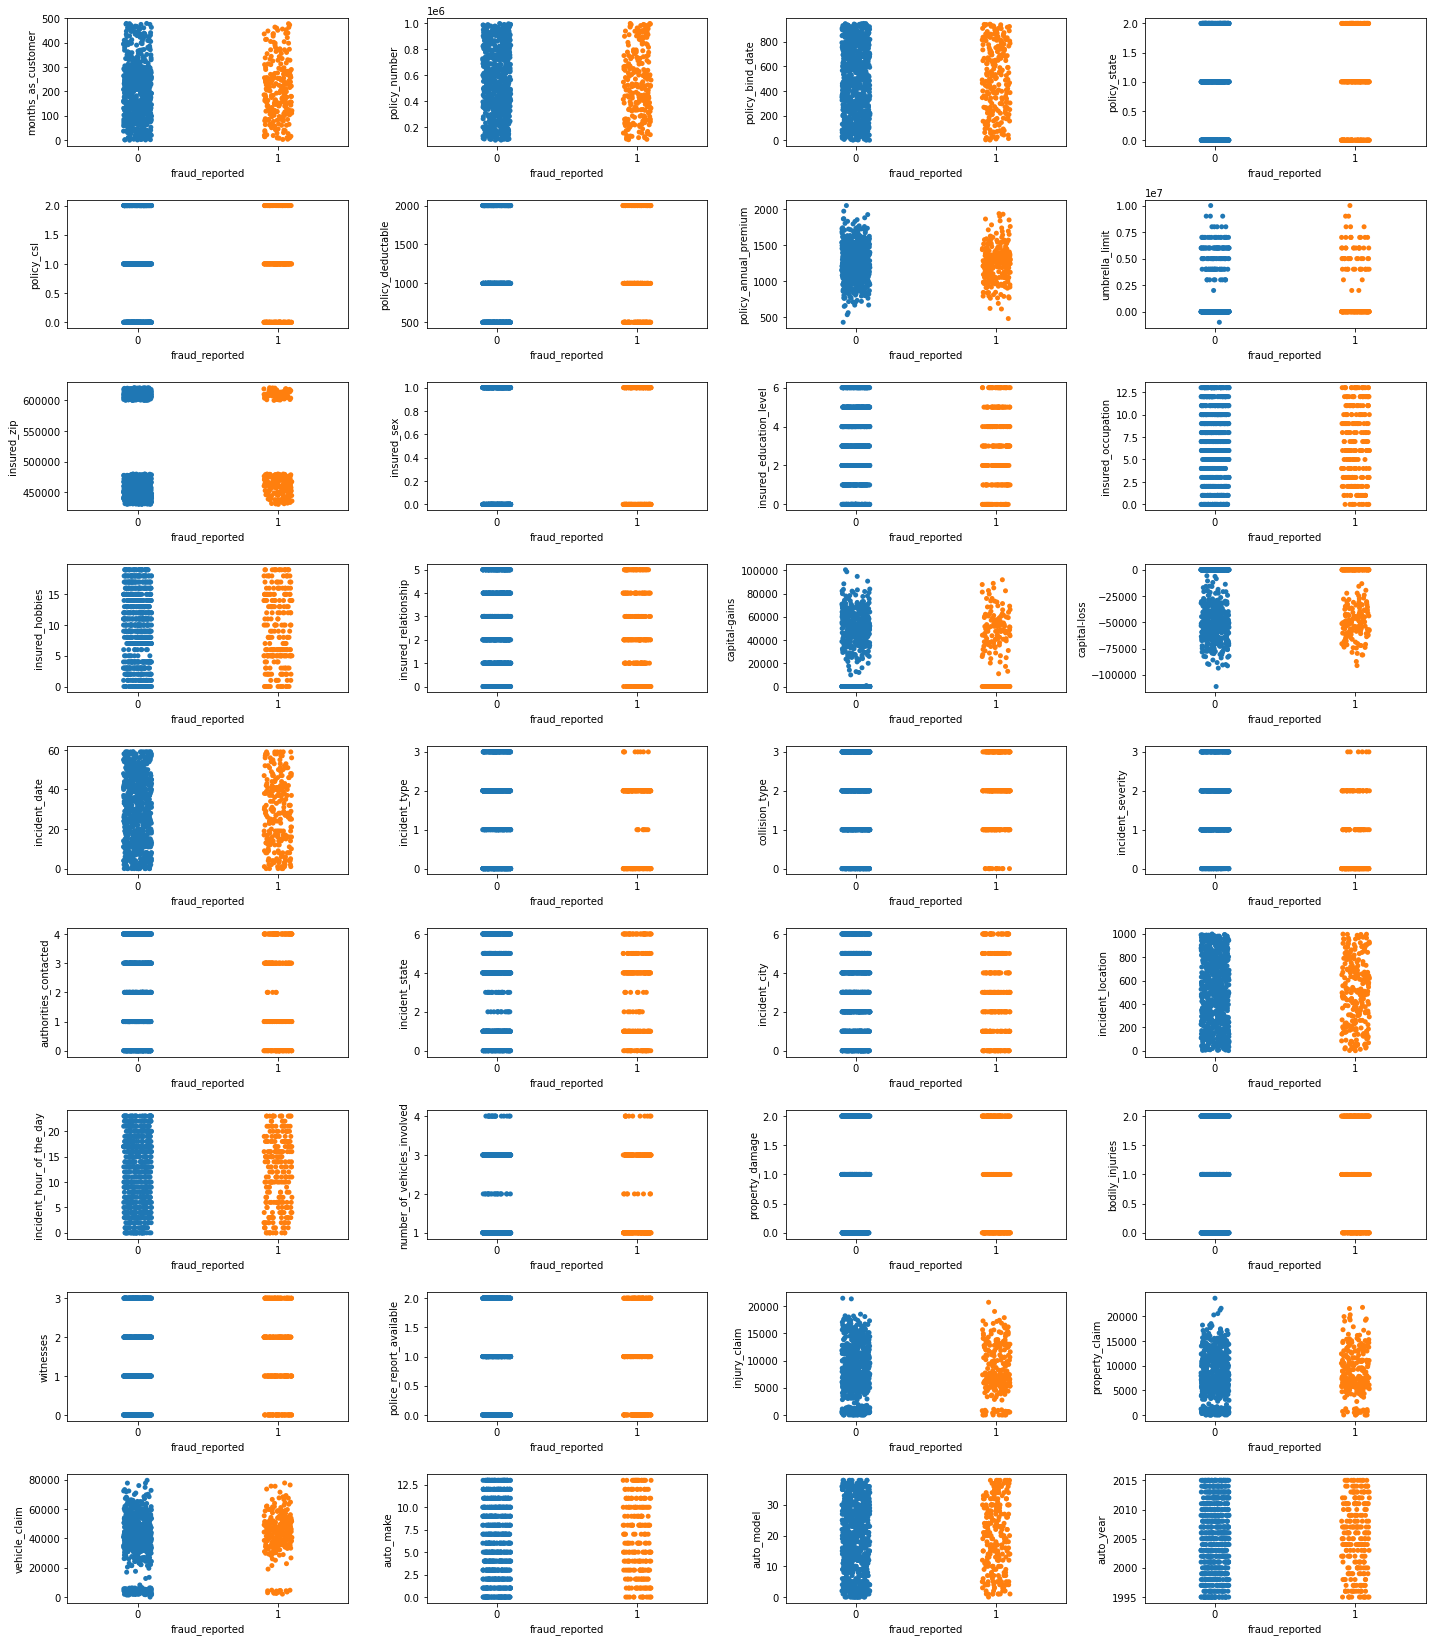

In [26]:
#let's see how features are related to class
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()


greta let's proceed by checking multicollinearity in the dependent variables. before that we should scale our data. let's use standard scalar for that

# Data Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [28]:
x_scaled

array([[ 1.07813958, -0.09595307,  0.20949985, ...,  0.85646614,
        -1.64574255, -0.1834404 ],
       [ 0.2089946 , -0.79152739,  1.25939678, ...,  0.36053902,
        -0.65747047,  0.31549088],
       [-0.60800168,  0.55056594, -1.04747018, ..., -0.63131523,
         0.95970204,  0.31549088],
       ...,
       [-0.64276748,  1.44891961,  0.12594404, ...,  1.1044297 ,
        -0.02857005, -1.5139238 ],
       [ 2.20802805, -0.04786687,  0.35844716, ..., -1.37520591,
        -1.28637088, -1.18130295],
       [ 2.19064515,  0.03830297, -0.41898517, ...,  0.36053902,
        -0.65747047,  0.31549088]])

finding variance inflation factor in each scaled column i.e.  x_scaled[1](1/(1-R2))

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]

vif["Features"]=x.columns

#let's check the values
vif

,vif,Features
0,1.051344,months_as_customer
1,1.031680,policy_number
2,1.028367,policy_bind_date
3,1.037511,policy_state
4,1.031208,policy_csl
5,1.037513,policy_deductable
6,1.040546,policy_annual_premium
7,1.030720,umbrella_limit
8,1.033802,insured_zip
9,1.026988,insured_sex


are the values of vif are 5 or less than 5 so we are good to go now

# Training Process

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split


In [31]:
#find best random state for train_test_split
maxAccu=0       #maximum accuracy
maxRS=0         #best random state

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu,"on random_state",maxRS)

Best Accuracy is 0.832 on random_state 65


# creating train test split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=93)

In [33]:
x_train

array([[-1.75527305, -0.25743784, -0.74957555, ..., -1.37520591,
        -1.28637088, -0.8486821 ],
       [-0.82528792, -0.22486144, -1.63599372, ...,  0.11257546,
         1.49875954, -1.68023423],
       [ 0.81739609,  0.96820555,  0.00242675, ...,  0.85646614,
        -1.46605672,  0.31549088],
       ...,
       [ 0.03516561, -0.3079877 , -0.7822713 , ...,  0.60850258,
         1.40891662, -1.01499253],
       [ 0.46104665,  0.02851448,  0.24946132, ...,  0.36053902,
        -0.65747047, -0.01712997],
       [-0.49501283, -0.08178992, -1.53790646, ...,  1.35239327,
        -0.92699922, -1.68023423]])

In [34]:
x_test

array([[ 0.46104665, -0.51112512,  0.1768041 , ..., -1.37520591,
        -1.3762138 , -0.51606125],
       [-0.70360763, -0.64985701, -1.1673546 , ...,  1.60035683,
         0.06127287,  1.47966386],
       [-1.04257417,  1.15892735,  0.16953837, ..., -1.37520591,
        -1.28637088, -1.18130295],
       ...,
       [-1.13818012,  1.44993544, -1.33083337, ..., -0.87927879,
         1.31907371, -0.34975082],
       [ 1.02599088,  0.86933986,  0.48196445, ...,  0.11257546,
         1.49875954,  0.81442215],
       [ 0.30460055, -0.15531451,  0.7689605 , ..., -1.12724235,
         1.67844537,  0.31549088]])

In [35]:
y_train

654    0
653    0
492    0
890    0
887    0
      ..
207    0
152    1
388    0
347    0
421    0
Name: fraud_reported, Length: 750, dtype: int32

In [36]:
y_test

328    1
803    1
928    0
158    0
662    0
      ..
126    0
383    1
194    0
748    0
449    0
Name: fraud_reported, Length: 250, dtype: int32

# Logistic Regression

In [37]:
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 76.8
[[168  15]
 [ 43  24]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       183
           1       0.62      0.36      0.45        67

    accuracy                           0.77       250
   macro avg       0.71      0.64      0.65       250
weighted avg       0.75      0.77      0.75       250



# Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 77.2
[[159  24]
 [ 33  34]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       183
           1       0.59      0.51      0.54        67

    accuracy                           0.77       250
   macro avg       0.71      0.69      0.70       250
weighted avg       0.76      0.77      0.77       250



# Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 74.8
[[173  10]
 [ 53  14]]
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       183
           1       0.58      0.21      0.31        67

    accuracy                           0.75       250
   macro avg       0.67      0.58      0.58       250
weighted avg       0.72      0.75      0.70       250



# SVC

In [40]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
ad_pred=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,ad_pred)*100)
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

Accuracy 77.2
[[159  24]
 [ 33  34]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       183
           1       0.59      0.51      0.54        67

    accuracy                           0.77       250
   macro avg       0.71      0.69      0.70       250
weighted avg       0.76      0.77      0.77       250



# cross validation score

In [47]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr,x_scaled,y,cv=5)
print("Cross Validation Score of Logistic Regression :",scr.mean()*100)

Cross Validation Score of Logistic Regression : 76.9


In [48]:
scr2=cross_val_score(svc,x_scaled,y,cv=5)
print("Cross Validation Score ofSVC Model :",scr2.mean()*100)

Cross Validation Score ofSVC Model : 74.49999999999999


In [49]:
scr3=cross_val_score(rf,x_scaled,y,cv=5)
print("Cross Validation Score of Random Forest Model :",scr3.mean()*100)

Cross Validation Score of Random Forest Model : 77.4


 Random Forest Classifier is performing better among all so we will continue with Random Forest Classifier

# Hyper Parameter Tunning

In [50]:
from sklearn.model_selection import GridSearchCV

#creating parameter list to pass in GridSearchCV
parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy']}

In [51]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")


In [52]:
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto'}

In [53]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.776

# ROC AUC Plot

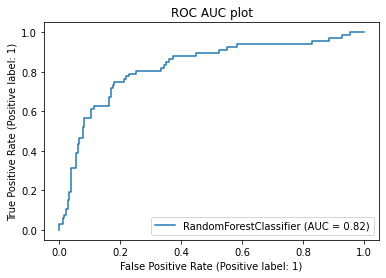

In [54]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

# final accuracy is 77% and AUC score is 82% which is pretty good

# save model

In [56]:
#Pickeling of file or serialization of a file
import joblib
joblib.dump(GCV.best_estimator_,"Insurance claims-Fraud Detection.pkl")

['Insurance claims-Fraud Detection.pkl']